Survived 열은 승객의 생존 여부
0: 사망
1: 생존

Pclass 열의 범주는 승객이 탑승한 선실의 등급
1: 1등석
2: 2등석
3: 3등석 

In [12]:
import pandas as pd
df_Titanic = pd.read_csv('../../datasets/TitanicFromDisaster_train.csv')
df_Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 결측치 확인

In [36]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [13]:

# 각 열의 결측치 개수 확인
missing_values = df_Titanic.isnull().sum()

# 결측치가 있는 열만 필터링
missing_values = missing_values[missing_values > 0]

print(missing_values)

Age         177
Cabin       687
Embarked      2
dtype: int64


In [58]:
# 수치형 열 통계량 계산
#
numeric_stats = df_Titanic[['Age', 'Fare']].agg(['mean', 'median', 'max', 'min', 'std'])
print("수치형 열 통계량:\n", numeric_stats)

# 범주형 열 고유값 및 빈도 계산
categorical_columns = ['Sex', 'Embarked']
for col in categorical_columns:
    unique_values = df_Titanic[col].unique()
    value_counts = df_Titanic[col].value_counts()
    print(f"\n열 '{col}'의 고유값 및 빈도:")
    print(f"고유값: {unique_values}")
    print(f"빈도:\n{value_counts}")

수치형 열 통계량:
               Age        Fare
mean    29.699118   32.204208
median  28.000000   14.454200
max     80.000000  512.329200
min      0.420000    0.000000
std     14.526497   49.693429

열 'Sex'의 고유값 및 빈도:
고유값: ['male' 'female']
빈도:
Sex
male      577
female    314
Name: count, dtype: int64

열 'Embarked'의 고유값 및 빈도:
고유값: ['S' 'C' 'Q' nan]
빈도:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


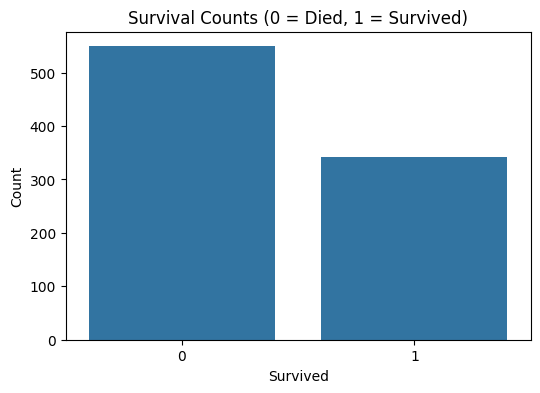

In [16]:
# 1. 생존 여부 분석
# (1) Survived 열의 값 빈도를 막대 그래프로 시각화
plt.figure(figsize=(6, 4))
sns.countplot(data=df_Titanic, x='Survived')
plt.title("Survival Counts (0 = Died, 1 = Survived)")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

In [18]:
# (2) 생존자 비율 계산
survival_rate = df_Titanic['Survived'].mean()
print(f"생존자 비율: {survival_rate:.2%}")


생존자 비율: 38.38%


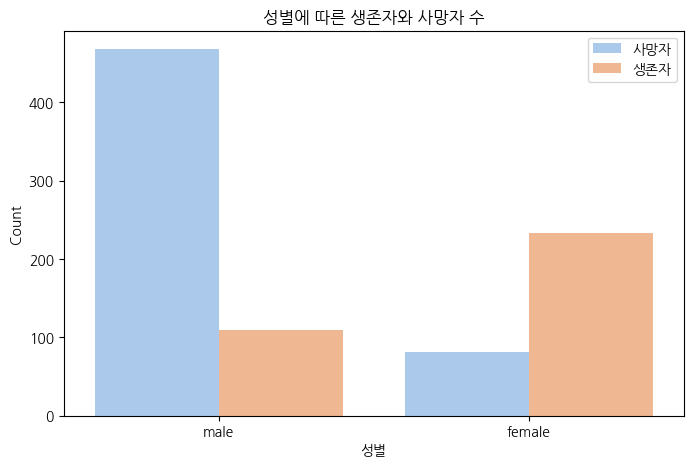

In [47]:
# 2. 성별에 따른 생존율 분석
# (1) 성별에 따라 생존자와 사망자의 분포 막대 그래프
plt.figure(figsize=(8, 5))
sns.countplot(data=df_Titanic, x='Sex', hue='Survived', palette='pastel')
plt.title("성별에 따른 생존자와 사망자 수")
plt.xlabel("성별")
plt.ylabel("Count")
plt.legend( labels=["사망자", "생존자"])
plt.show()

In [20]:
# (2) 각 성별 생존율 계산
gender_survival_rate = df_Titanic.groupby('Sex')['Survived'].mean()
print("성별 생존율:\n", gender_survival_rate)

성별 생존율:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [21]:
# 3. 객실 등급(Pclass) 분석
# (1) 객실 등급별 생존율 계산
pclass_survival_rate = df_Titanic.groupby('Pclass')['Survived'].mean()
print("객실 등급별 생존율:\n", pclass_survival_rate)

객실 등급별 생존율:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


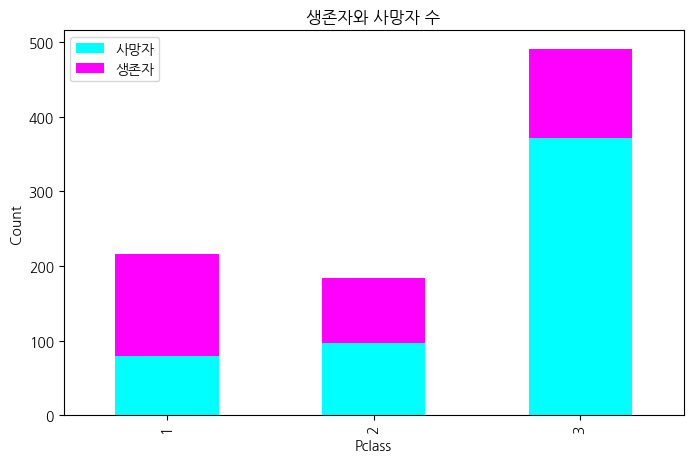

In [46]:
# (2) 객실 등급에 따른 생존자와 사망자 수 스택형 막대 그래프
pclass_survival = df_Titanic.groupby(['Pclass', 'Survived'])['Survived'].count().unstack()
pclass_survival.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='cool')
plt.title("생존자와 사망자 수")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.legend( labels=["사망자", "생존자"])
plt.show()

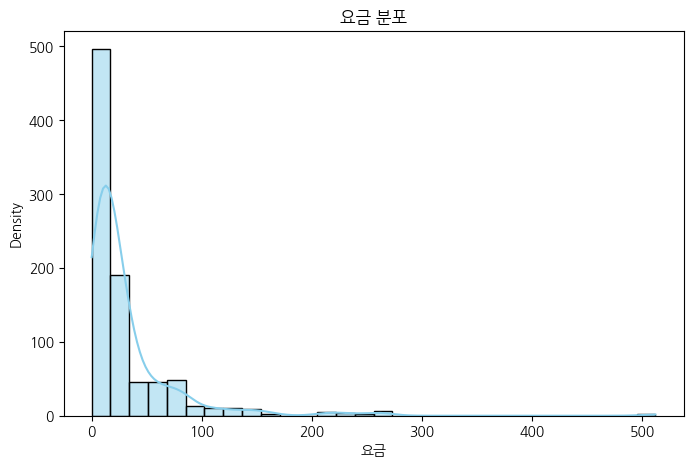

In [44]:
# 4. 요금(Fare) 분포
# (1) 요금의 분포 히스토그램
plt.figure(figsize=(8, 5))
sns.histplot(df_Titanic['Fare'], bins=30, kde=True, color='skyblue')
plt.title("요금 분포")
plt.xlabel("요금")
plt.ylabel("Density")
plt.show()

In [28]:
# (2) 요금 분포 이상치 확인
fare_q1 = df_Titanic['Fare'].quantile(0.25)
fare_q3 = df_Titanic['Fare'].quantile(0.75)
fare_iqr = fare_q3 - fare_q1
fare_lower_bound = fare_q1 - 1.5 * fare_iqr
fare_upper_bound = fare_q3 + 1.5 * fare_iqr
outliers = df_Titanic[(df_Titanic['Fare'] < fare_lower_bound) | (df_Titanic['Fare'] > fare_upper_bound)]
print(f"이상치 수: {outliers.shape[0]}")
print("이상치 데이터:\n", outliers[['Fare']])

이상치 수: 116
이상치 데이터:
          Fare
1     71.2833
27   263.0000
31   146.5208
34    82.1708
52    76.7292
..        ...
846   69.5500
849   89.1042
856  164.8667
863   69.5500
879   83.1583

[116 rows x 1 columns]


In [29]:
# 5. 탑승 항구(Embarked) 분석
# (1) 각 탑승 항구별 승객 수
embarked_counts = df_Titanic['Embarked'].value_counts()
print("각 항구별 승객 수:\n", embarked_counts)


각 항구별 승객 수:
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [30]:
# (2) 각 항구별 생존율 계산
embarked_survival_rate = df_Titanic.groupby('Embarked')['Survived'].mean()
print("각 항구별 생존율:\n", embarked_survival_rate)

각 항구별 생존율:
 Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


/tmp/ipykernel_75796/123608613.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_Titanic['Age'].dropna(), shade=True, color='green')


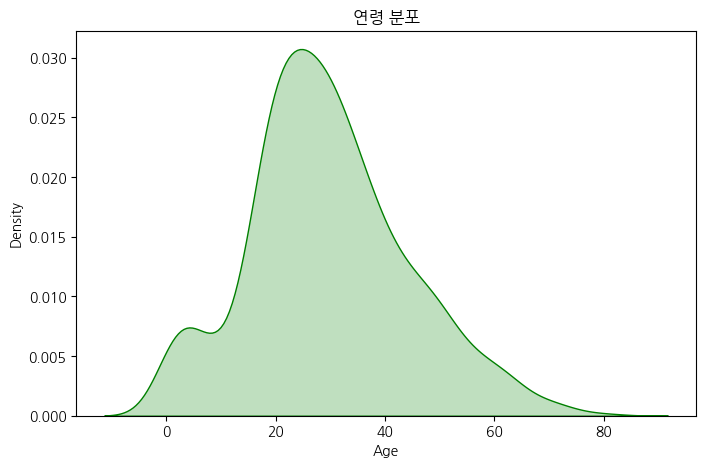

In [43]:
# 6. 연령(Age) 분석
# (1) 연령 분포 밀도 차트
plt.figure(figsize=(8, 5))
sns.kdeplot(df_Titanic['Age'].dropna(), shade=True, color='green')
plt.title("연령 분포")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

/tmp/ipykernel_75796/3037075156.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_Titanic, x='Age', hue='Survived', shade=True, palette='muted')


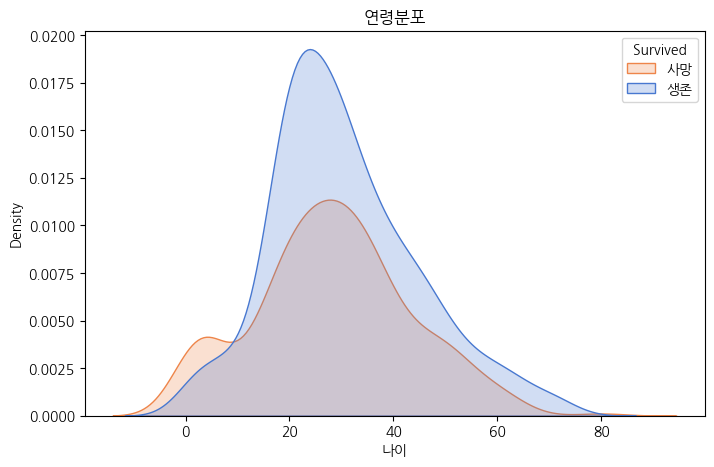

In [42]:
# (2) 생존자와 사망자의 연령 분포 비교
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df_Titanic, x='Age', hue='Survived', shade=True, palette='muted')
plt.title("연령분포")
plt.xlabel("나이")
plt.ylabel("Density")
plt.legend(title="Survived", labels=["사망", "생존"])
plt.show()

In [33]:
# IsAlone 열 추가
df_Titanic['IsAlone'] = (df_Titanic['SibSp'] + df_Titanic['Parch'] == 0).astype(int)

In [34]:
# 가족 여부에 따른 생존율 계산
isalone_survival_rate = df_Titanic.groupby('IsAlone')['Survived'].mean()

/tmp/ipykernel_75796/2263060150.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=isalone_survival_rate.index, y=isalone_survival_rate.values, palette="viridis")


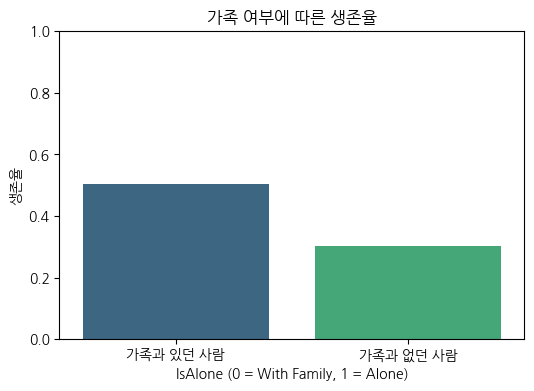

In [40]:
# 3. 생존율 시각화
plt.figure(figsize=(6, 4))
sns.barplot(x=isalone_survival_rate.index, y=isalone_survival_rate.values, palette="viridis")
plt.title("가족 여부에 따른 생존율")
plt.xlabel("IsAlone (0 = With Family, 1 = Alone)")
plt.ylabel("생존율")
plt.ylim(0, 1)
plt.xticks(ticks=[0, 1], labels=["가족과 있던 사람", "가족과 없던 사람"])
plt.show()

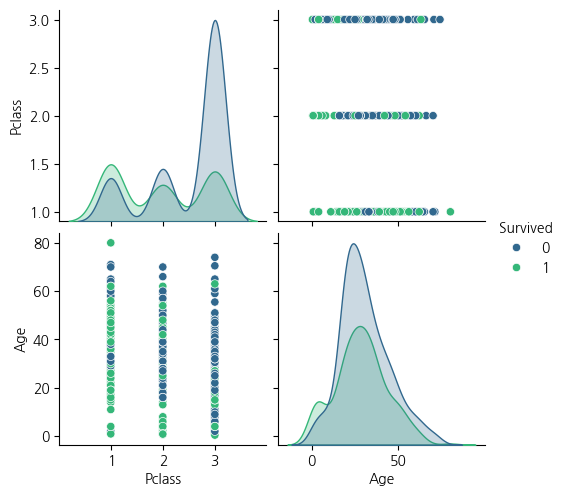

In [50]:
# 필요한 열만 선택
selected_columns = ['Survived', 'Pclass', 'Sex', 'Age']
df_selected = df_Titanic[selected_columns]

# 성별과 생존 여부를 기반으로 시각화
sns.pairplot(data=df_selected, hue='Survived', palette='viridis')
plt.show()